# Ridhima Taneja<br>21BCE2188<br>Assignment 3<br>Morning Slot

#### 1. Import the Libraries.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### 2. Importing the dataset

In [3]:
df=pd.read_csv("Titanic-Dataset.csv")

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


###### Removing columns which do not play any role in predicting output (Survival) count

In [5]:
cols = ['Name', 'Ticket', 'Cabin','PassengerId']
df = df.drop(cols, axis=1)

In [6]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


#### 3. Checking for Null Values and eliminating them

In [7]:
df.isnull().any()

Survived    False
Pclass      False
Sex         False
Age          True
SibSp       False
Parch       False
Fare        False
Embarked     True
dtype: bool

In [8]:
df["Age"].fillna(df["Age"].mean(),inplace=True)

In [9]:
df["Embarked"].fillna(df["Embarked"].mode()[0],inplace=True)

In [10]:
df.isnull().any()

Survived    False
Pclass      False
Sex         False
Age         False
SibSp       False
Parch       False
Fare        False
Embarked    False
dtype: bool

#### 4.Data Visualization.

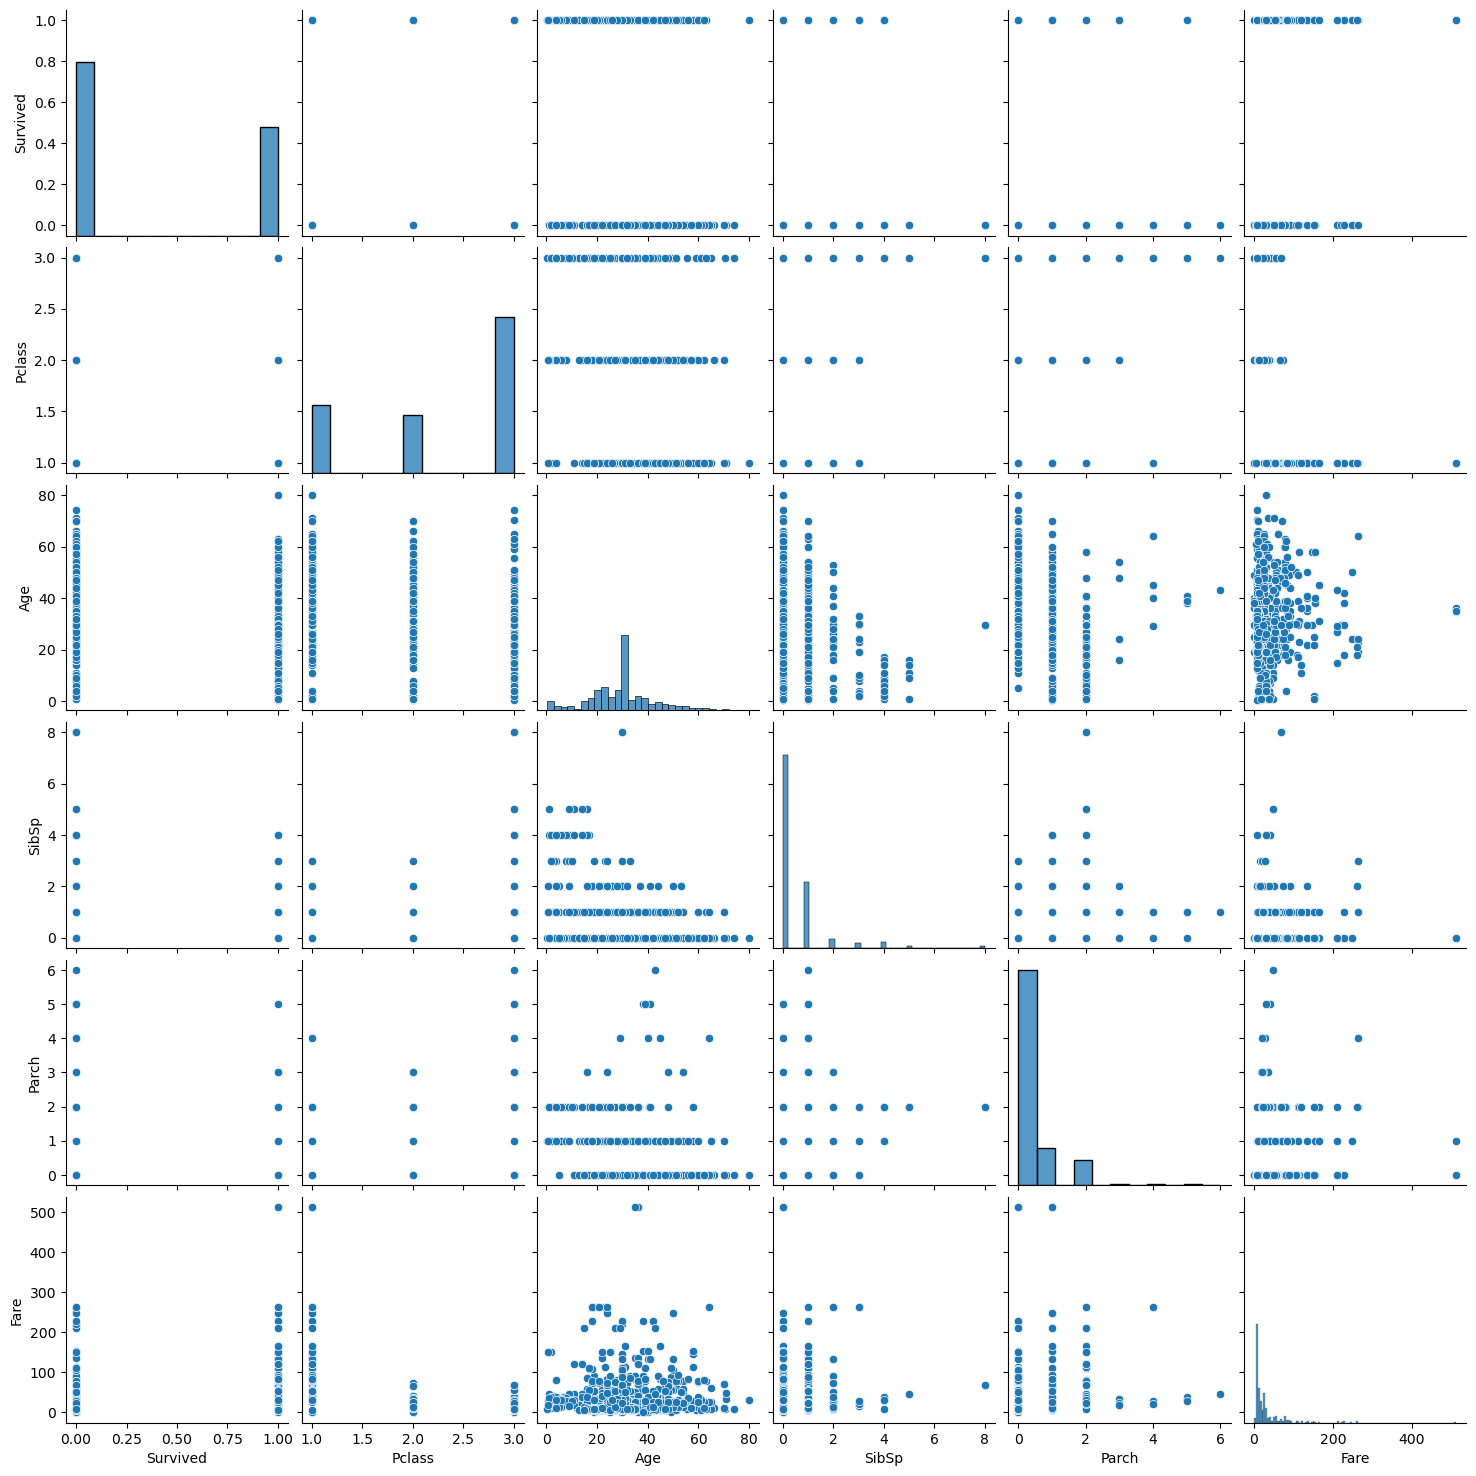

In [11]:
sns.pairplot(data=df)

C:\Users\tanej\AppData\Local\Temp\ipykernel_12480\3803735512.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=df.corr(),annot=True)


<Axes: >

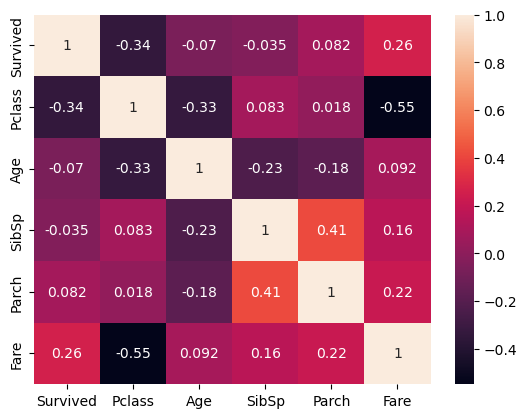

In [12]:
sns.heatmap(data=df.corr(),annot=True)

#### 5. Outlier Detection

<Axes: >

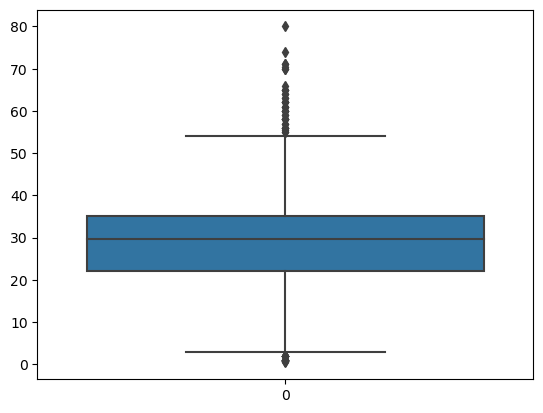

In [13]:
sns.boxplot(data=df["Age"])

In [14]:
#Removing outliers for Age coulmn
q1 = df.Age.quantile(0.25)
q3 = df.Age.quantile(0.75)
IQR =q3-q1
upper_limit =q3+1.5*IQR
upper_limit

54.5

In [15]:
lower_limit =q1-1.5*IQR
lower_limit

2.5

In [16]:
df = df[(df.Age<upper_limit) & (lower_limit<df.Age)]

<Axes: >

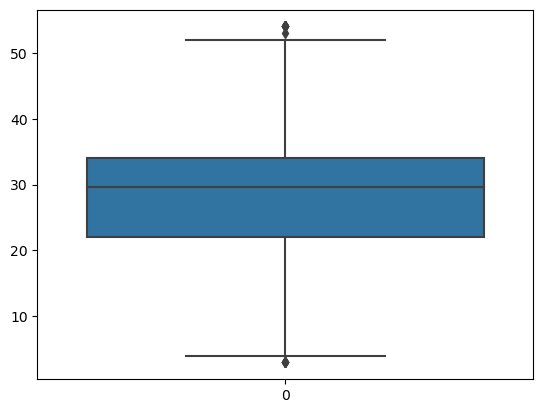

In [17]:
sns.boxplot(data=df["Age"])

In [19]:
df.shape

(825, 8)

In [20]:
from scipy import stats
age_zscore = np.abs(stats.zscore(df.Age))
age_zscore

0      0.676034
1      0.896210
2      0.282973
3      0.601414
4      0.601414
         ...   
886    0.184708
887    0.970830
888    0.080521
889    0.282973
890    0.306618
Name: Age, Length: 825, dtype: float64

In [21]:
df=df[np.abs(age_zscore)<=3]

<Axes: >

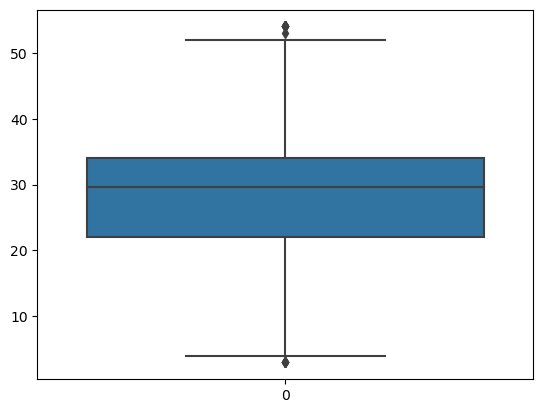

In [22]:
sns.boxplot(data=df["Age"])

In [23]:
df.shape

(825, 8)

In [24]:
p99 = df.Age.quantile(0.99)
p99

52.75999999999999

In [25]:
p01 = df.Age.quantile(0.01)
p01

4.0

In [26]:
df = df[(df.Age <= p99) & (df.Age >= p01)]

<Axes: >

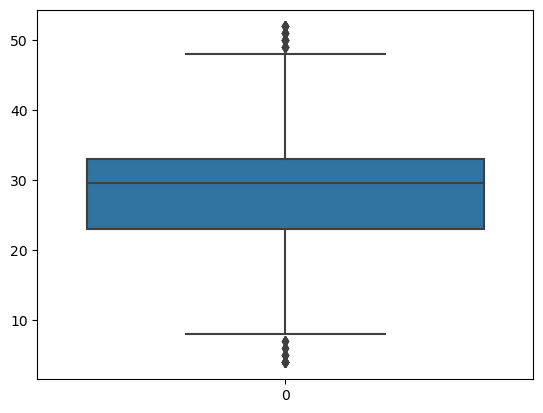

In [27]:
sns.boxplot(data=df["Age"])

In [29]:
df.shape

(810, 8)

<Axes: >

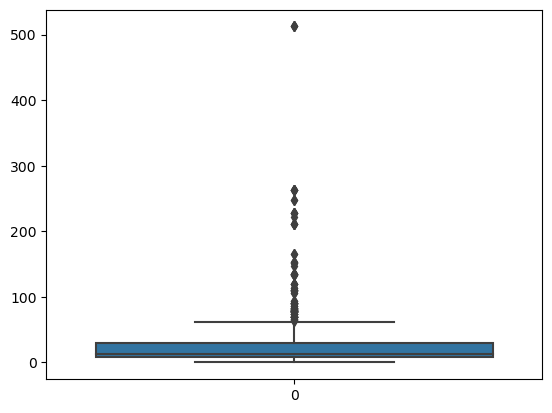

In [30]:
sns.boxplot(data=df["Fare"])

In [31]:
q1 = df.Fare.quantile(0.25)
q3 = df.Fare.quantile(0.75)
IQR =q3-q1
upper_limit =q3+1.5*IQR
upper_limit

63.1563

In [32]:
df = df[(df.Fare<upper_limit)]

<Axes: >

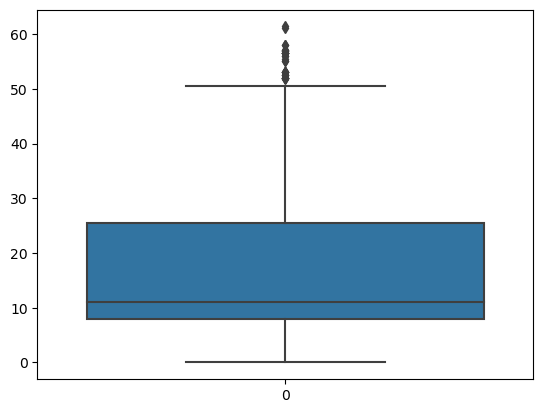

In [33]:
sns.boxplot(data=df["Fare"])

In [34]:
fare_zscore = np.abs(stats.zscore(df.Fare))
fare_zscore

0      0.740778
2      0.689142
3      2.766613
4      0.679580
5      0.648346
         ...   
886    0.300920
887    0.999531
888    0.498475
889    0.999531
890    0.702529
Name: Fare, Length: 705, dtype: float64

In [35]:
df=df[np.abs(fare_zscore)<=3]

<Axes: >

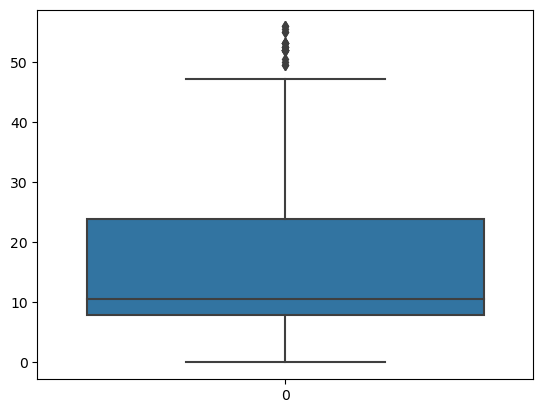

In [36]:
sns.boxplot(data=df["Fare"])

In [37]:
df.shape

(690, 8)

In [38]:
p99 = df.Fare.quantile(0.99)
p99

53.1

In [39]:
df = df[df.Fare<=p99]

<Axes: >

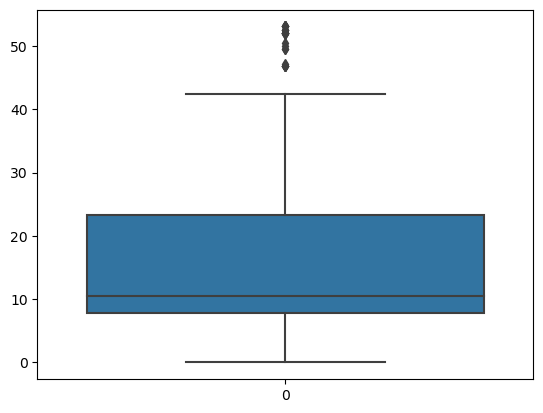

In [40]:
sns.boxplot(data=df["Fare"])

In [41]:
df.shape

(685, 8)

<Axes: >

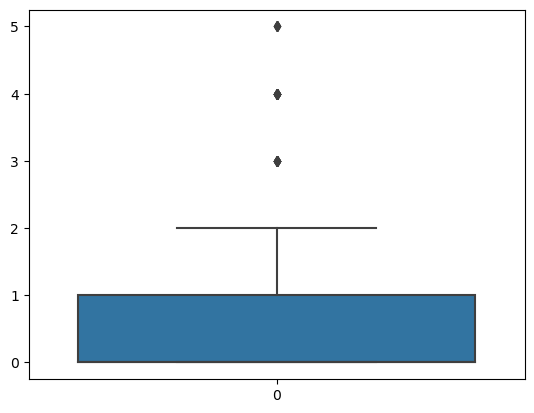

In [42]:
sns.boxplot(data=df["SibSp"])

In [43]:
q1 = df.SibSp.quantile(0.25)
q3 = df.SibSp.quantile(0.75)
IQR =q3-q1
upper_limit =q3+1.5*IQR
upper_limit

2.5

In [44]:
df = df[(df.SibSp<upper_limit)]

<Axes: >

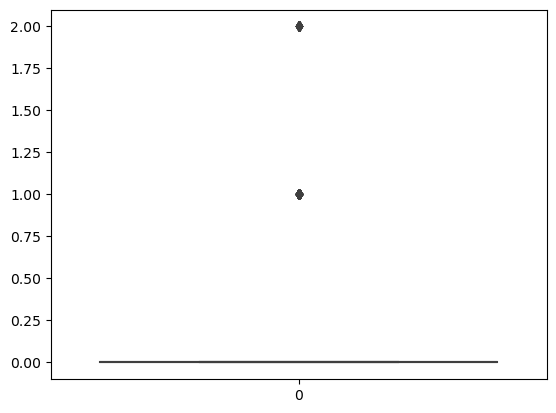

In [45]:
sns.boxplot(data=df["SibSp"])

In [46]:
sibsp_zscore = np.abs(stats.zscore(df.SibSp))
sibsp_zscore

0      1.492991
2      0.528384
3      1.492991
4      0.528384
5      0.528384
         ...   
886    0.528384
887    0.528384
888    1.492991
889    0.528384
890    0.528384
Name: SibSp, Length: 658, dtype: float64

In [47]:
df=df[np.abs(sibsp_zscore)<=3]

In [48]:
df.shape

(641, 8)

In [49]:
p99 = df.SibSp.quantile(0.99)
p99

1.0

In [50]:
df = df[df.SibSp<=p99]

In [51]:
df.shape

(641, 8)

<Axes: >

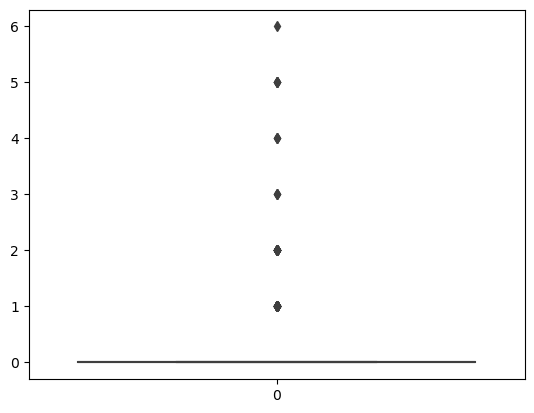

In [52]:
sns.boxplot(data=df["Parch"])

In [53]:
q1 = df.Parch.quantile(0.25)
q3 = df.Parch.quantile(0.75)
IQR =q3-q1
upper_limit =q3+1.5*IQR
upper_limit

0.0

In [54]:
parch_zscore = np.abs(stats.zscore(df.Parch))
parch_zscore

0      0.337679
2      0.337679
3      0.337679
4      0.337679
5      0.337679
         ...   
886    0.337679
887    0.337679
888    2.334570
889    0.337679
890    0.337679
Name: Parch, Length: 641, dtype: float64

In [55]:
df=df[np.abs(parch_zscore)<=3]

In [56]:
df.shape

(629, 8)

<Axes: >

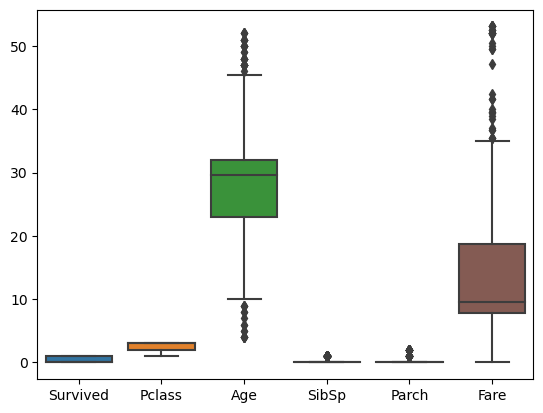

In [57]:
sns.boxplot(data=df)

In [58]:
p99 = df.Parch.quantile(0.99)
p99

2.0

In [59]:
df = df[df.Parch<=p99]

In [60]:
df.shape

(629, 8)

In [61]:
q1 = df.Age.quantile(0.25)
q3 = df.Age.quantile(0.75)
IQR =q3-q1
upper_limit =q3+1.5*IQR
upper_limit

45.5

In [62]:
lower_limit =q1-1.5*IQR
lower_limit

9.5

In [63]:
df = df[(df.Age<upper_limit) & (lower_limit<df.Age)]

In [64]:
df.shape

(580, 8)

<Axes: >

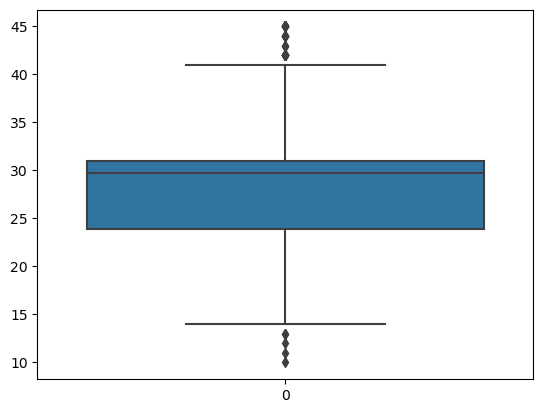

In [65]:
sns.boxplot(data=df["Age"])

In [72]:
q1 = df.Fare.quantile(0.25)
q3 = df.Fare.quantile(0.75)
IQR =q3-q1
upper_limit =q3+1.5*IQR
upper_limit

28.587500000000002

In [73]:
df = df[(df.Fare<upper_limit)]

In [74]:
df.shape

(529, 8)

<Axes: >

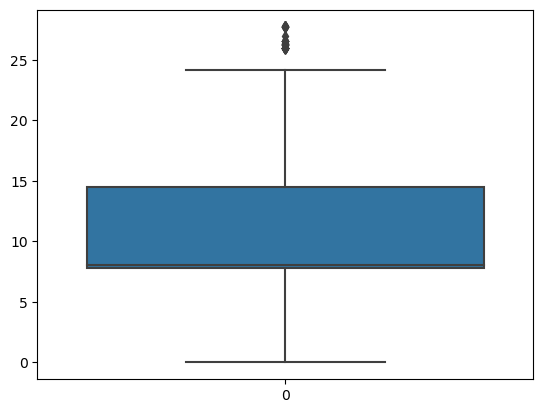

In [75]:
sns.boxplot(data=df["Fare"])

#### 6. Splitting dependent and independent variables

In [79]:
#The output variable is the column survived and the remaining coulmns are the independent variables which will be used to predict the value of the dependent variable survivied.

In [80]:
x=df.drop(columns=["Survived"],axis=1)
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.000000,1,0,7.2500,S
2,3,female,26.000000,0,0,7.9250,S
4,3,male,35.000000,0,0,8.0500,S
5,3,male,29.699118,0,0,8.4583,Q
8,3,female,27.000000,0,2,11.1333,S


In [81]:
x.shape

(529, 7)

In [82]:
type(x)

pandas.core.frame.DataFrame

In [83]:
y=df["Survived"]
y.head()

0    0
2    1
4    0
5    0
8    1
Name: Survived, dtype: int64

#### 7. Perform Encoding

In [84]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [85]:
x["Sex"]=le.fit_transform(x["Sex"])

In [86]:
x["Embarked"]=le.fit_transform(x["Embarked"])

In [87]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.000000,1,0,7.2500,2
2,3,0,26.000000,0,0,7.9250,2
4,3,1,35.000000,0,0,8.0500,2
5,3,1,29.699118,0,0,8.4583,1
8,3,0,27.000000,0,2,11.1333,2


In [88]:
mapping=dict(zip(le.classes_,range(len(le.classes_))))
mapping

{'C': 0, 'Q': 1, 'S': 2}

#### 8. Feature Scaling

In [89]:
from sklearn.preprocessing import MinMaxScaler

In [90]:
ms=MinMaxScaler()

In [91]:
x_scaled=pd.DataFrame(ms.fit_transform(x),columns=x.columns)

In [92]:
x_scaled.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1.0,1.0,0.342857,1.0,0.0,0.261261,1.0
1,1.0,0.0,0.457143,0.0,0.0,0.285586,1.0
2,1.0,1.0,0.714286,0.0,0.0,0.290090,1.0
3,1.0,1.0,0.562832,0.0,0.0,0.304804,0.5
4,1.0,0.0,0.485714,0.0,1.0,0.401200,1.0


#### 9. Splitting Data into Train and Test

In [93]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size =0.2,random_state =0)

In [94]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(423, 7) (106, 7) (423,) (106,)


In [95]:
from sklearn.linear_model import LinearRegression

In [96]:
lr=LinearRegression()

In [97]:
lr.fit(x_train,y_train)

LinearRegression()

In [98]:
y_pred=lr.predict(x_test)

In [100]:
y_pred

array([ 0.08766752,  0.09623477,  0.10456994,  0.69762222,  0.08153503,
        0.64949183,  0.34061257,  0.78012701,  0.08766752,  0.08980025,
        0.07744929,  0.00999094,  0.11478263,  0.64949183,  0.67246224,
        0.0889585 ,  0.72235571,  0.113003  ,  0.17154922,  0.11377746,
        0.08636064,  0.75766672,  0.09362108, -0.00721807,  0.08058641,
        0.11478263,  0.20251046,  0.1367127 ,  0.20667781,  0.08743972,
        0.19727054,  0.13674786,  0.08639803,  0.22284535,  0.62962165,
        0.08948175,  0.2251293 ,  0.64980579,  0.10151424,  0.04399656,
        0.76272708,  0.0892744 ,  0.49474432,  0.09249814,  0.14678244,
        0.48178647,  0.20905916,  0.2288174 ,  0.21821201,  0.09205372,
        0.65654097,  0.73584349,  0.55094009,  0.2844648 ,  0.54378454,
        0.08044467,  0.72724775,  0.2270127 ,  0.759653  ,  0.62048683,
        0.20306028,  0.63476344,  0.24857999,  0.81318351,  0.75558304,
        0.42567646,  0.76887137,  0.11377746,  0.11931257,  0.21

In [101]:
y_pred=np.round(y_pred,decimals=0).astype(int)

In [102]:
y_test

738    0
67     0
682    0
128    1
561    0
      ..
187    1
411    0
112    0
680    0
719    0
Name: Survived, Length: 106, dtype: int64

In [103]:
survive=pd.DataFrame({"Actual_survived":y_test,"Predicted_survived":y_pred})

In [104]:
survive

,Actual_survived,Predicted_survived
738,0,0
67,0,0
682,0,0
128,1,1
561,0,0
...,...,...
187,1,0
411,0,0
112,0,0
680,0,1
